## Question 1

In [1]:
import matplotlib.pyplot as plt
import scipy.io as spio
import numpy as np
from scipy import signal

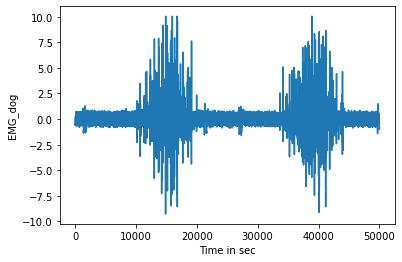

In [2]:

# Read data file
Fs1 = 10000.0      # sampling frequency 

x=np.loadtxt('emg_dog2.dat',delimiter=',') #loading data
x = x - np.mean(x)


plt.plot(x)  #plotting signal
plt.ylabel('EMG_dog')
plt.xlabel('Time in sec') 
plt.show()


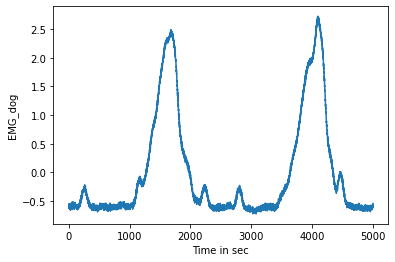

In [3]:

# Read data file(reference envolope signal)
Fs1 = 10000.0      # sampling frequency 

y=np.loadtxt('emg_dog2_env.dat',delimiter=',') #loading data
y = y - np.mean(y)


plt.plot(y)  #plotting signal
plt.ylabel('EMG_dog')
plt.xlabel('Time in sec') 
plt.show()


### part i

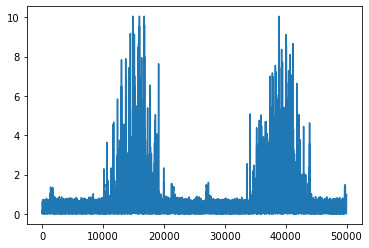

In [4]:
#fullwave rectification
len=x.size
emg_fwr=np.zeros(len)
for i in range(len):
    if x[i]>0:
        emg_fwr[i]=x[i]
    else:
        emg_fwr[i]=-x[i]
plt.plot(emg_fwr)
plt.show()

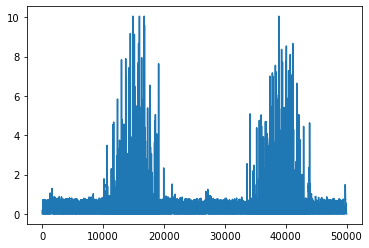

In [5]:
#Halfwave rectification
len=x.size
emg_hwr=np.zeros(len)
for i in range(len):
    if x[i]>0:
        emg_hwr[i]=x[i]
    else:
        emg_hwr[i]=0
plt.plot(emg_hwr)
plt.show()

### part ii

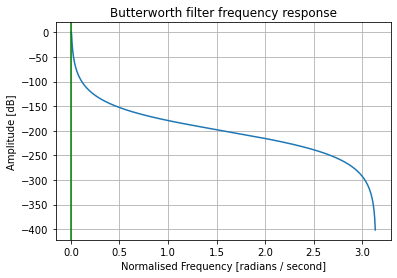

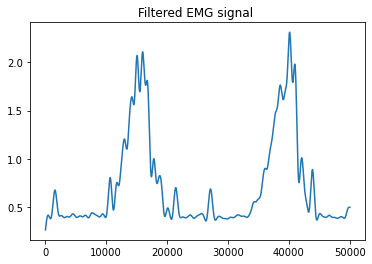

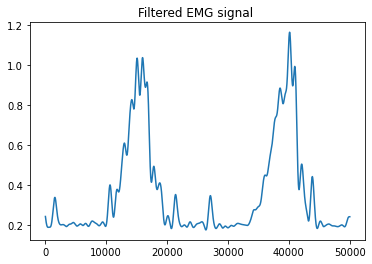

In [39]:
#part a
#Butterworth filter design
N=4

cf=10
fs=10000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.axvline((cf/fs)*2, color='green') # cutoff frequency
plt.show()


#passing through filter

filt_emg_fwr=signal.filtfilt(b,a,emg_fwr)
plt.plot(filt_emg_fwr)
plt.title("Filtered EMG signal ")
plt.show()

filt_emg_hwr=signal.filtfilt(b,a,emg_hwr)
plt.plot(filt_emg_hwr)
plt.title("Filtered EMG signal ")
plt.show()

C:\Users\SAIJOS~1\AppData\Local\Temp/ipykernel_16676/996281079.py:9: RuntimeWarning: divide by zero encountered in log10
  plt.plot(w, 20*np.log10(abs(h)))


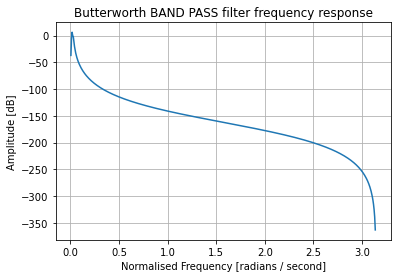

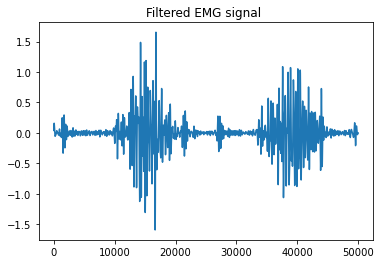

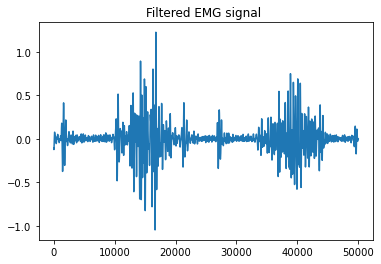

In [7]:
#part a
#Butterworth band pass filter
N=4
fs=10000
hpcf=20
lpcf=50
b,a = signal.butter(N, [(hpcf/fs)*2,(lpcf/fs)*2], 'band')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth BAND PASS filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.show()

#passing through filter

filt_emg_fwr=signal.filtfilt(b,a,emg_fwr)
plt.plot(filt_emg_fwr)
plt.title("Filtered EMG signal ")
plt.show()

filt_emg_hwr=signal.filtfilt(b,a,emg_hwr)
plt.plot(filt_emg_hwr)
plt.title("Filtered EMG signal ")
plt.show()

## Question 2

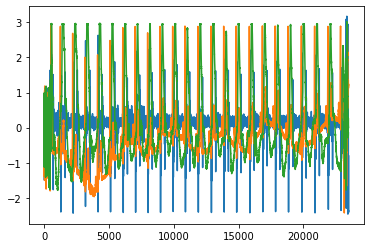

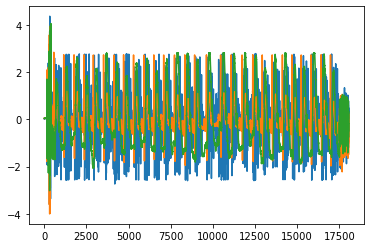

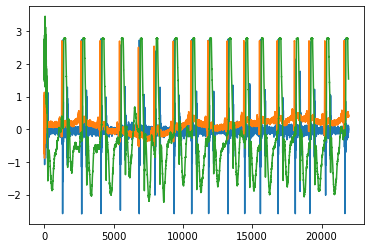

In [8]:
import numpy as np
pec1_sig=np.loadtxt('pec1.dat')
pec1_sig=pec1_sig-np.mean(pec1_sig)
pec33_sig=np.loadtxt('pec33.dat')
pec33_sig=pec33_sig-np.mean(pec33_sig)
pec52_sig=np.loadtxt('pec52.dat')
pec52_sig=pec52_sig-np.mean(pec52_sig)
fs=4000

plt.plot(pec1_sig)
plt.show()

plt.plot(pec33_sig)
plt.show()

plt.plot(pec52_sig)
plt.show()

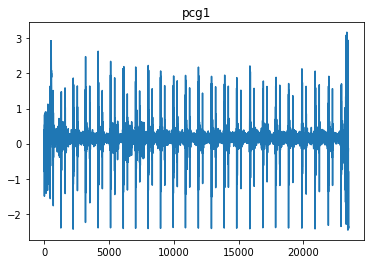

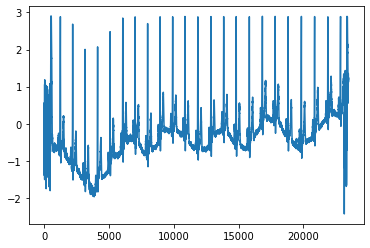

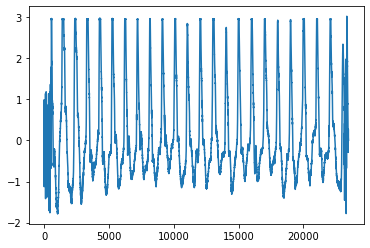

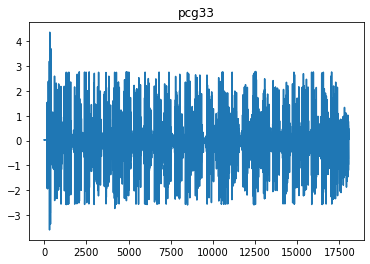

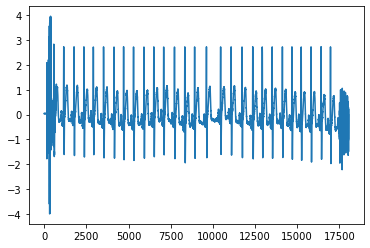

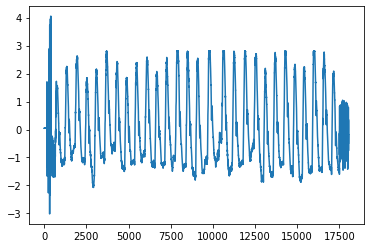

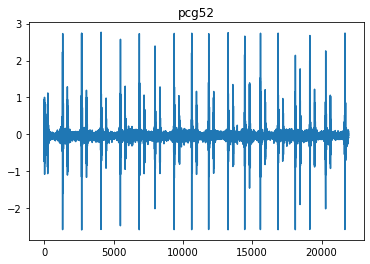

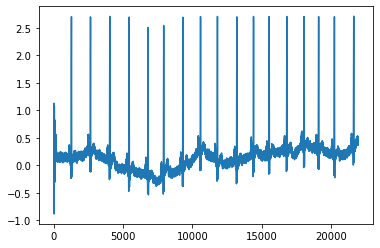

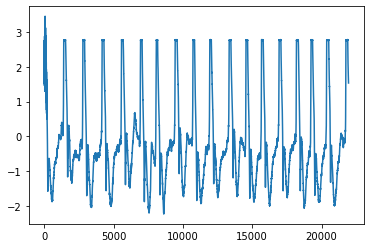

In [9]:
plt.title("pcg1")
for i in range(3):
    plt.plot(pec1_sig[:,i])
    plt.show()
plt.title("pcg33")
for i in range(3):
    plt.plot(pec33_sig[:,i])
    plt.show()
plt.title("pcg52")
for i in range(3):
    plt.plot(pec52_sig[:,i])
    plt.show()

In [10]:
#beat locations found by pantomkin algo
#s1 is R point
#s2 at dirotic notch
#s1 and s2 neither same nor periodic

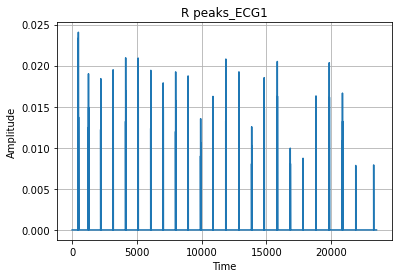

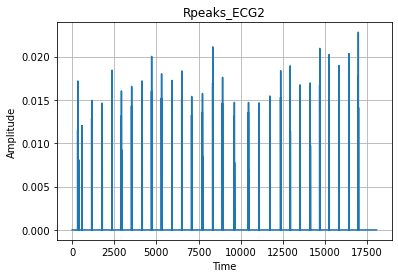

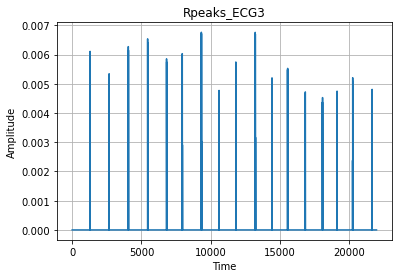

In [11]:
#detecting thresholds using pantompkins algorithm.


sig1=pec1_sig[:,1]
sig2=pec33_sig[:,1]
sig3=pec52_sig[:,1]
#Butterworth filter design
N=8 #order of the filter( changed different values 8,4 and 2)

#Butterworth lowpass filter

lpcf=11
fs=200
b,a = signal.butter(N, (lpcf/fs)*2, 'low')
w, h = signal.freqz(b,a)
#Filtering input ECG signals
lpfilt_ecg1 = signal.filtfilt(b,a,sig1)
lpfilt_ecg2 = signal.filtfilt(b,a,sig2)
lpfilt_ecg3 = signal.filtfilt(b,a,sig3)
# Butterworth high pass filter

hpcf=5
fs=200
b,a = signal.butter(N, (hpcf/fs)*2, 'high')
w, h = signal.freqz(b,a)
#Filtering input ECG signals
filt_ecg1 = signal.filtfilt(b,a,lpfilt_ecg1)
filt_ecg2 = signal.filtfilt(b,a,lpfilt_ecg2)
filt_ecg3 = signal.filtfilt(b,a,lpfilt_ecg3)
#part b
#Design of derivative filter

num= np.array([2,1,1,-1,-1,-2])/14
w,h= signal.freqz(num)
#After passing output of butterworth filtered signal to derivative filter
der_filt_ecg1 = signal.convolve(num,filt_ecg1)
der_filt_ecg2 = signal.convolve(num,filt_ecg2)
der_filt_ecg3 = signal.convolve(num,filt_ecg3)
#part c
#squaring
sq_ECGsig1=der_filt_ecg1**2
sq_ECGsig2=der_filt_ecg2**2
sq_ECGsig3=der_filt_ecg3**2
#part d
#integration

num=(1/16)*np.ones([16])
w,h= signal.freqz(num)
#After passing output of squaring signal to integration filter
intgr_filt_ecg1 = signal.convolve(num,sq_ECGsig1)
intgr_filt_ecg2 = signal.convolve(num,sq_ECGsig2)
intgr_filt_ecg3 = signal.convolve(num,sq_ECGsig3)

#Thresold at 40% of maximum value
t=0.3
Threshold= t*np.max(intgr_filt_ecg1)
final_ecg_out1= np.zeros(np.size(intgr_filt_ecg1))
for i in np.arange(0,np.size(intgr_filt_ecg1)):
    if (intgr_filt_ecg1[i]>Threshold and intgr_filt_ecg1[i]>intgr_filt_ecg1[i+1] and intgr_filt_ecg1[i]>intgr_filt_ecg1[i-1]):
        final_ecg_out1[i]=intgr_filt_ecg1[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('R peaks_ECG1')
plt.grid()
plt.plot(final_ecg_out1)
plt.show()

Threshold= t*np.max(intgr_filt_ecg2)
final_ecg_out2= np.zeros(np.size(intgr_filt_ecg2))
for i in np.arange(0,np.size(intgr_filt_ecg2)):
    if (intgr_filt_ecg2[i]>Threshold and intgr_filt_ecg2[i]>intgr_filt_ecg2[i+1] and intgr_filt_ecg2[i]>intgr_filt_ecg2[i-1]):
        final_ecg_out2[i]=intgr_filt_ecg2[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Rpeaks_ECG2')
plt.grid()
plt.plot(final_ecg_out2)
plt.show()

Threshold= t*np.max(intgr_filt_ecg3)
final_ecg_out3= np.zeros(np.size(intgr_filt_ecg3))
for i in np.arange(0,np.size(intgr_filt_ecg3)):
    if (intgr_filt_ecg3[i]>Threshold and intgr_filt_ecg3[i]>intgr_filt_ecg3[i+1] and intgr_filt_ecg3[i]>intgr_filt_ecg3[i-1]):
        final_ecg_out3[i]=intgr_filt_ecg3[i]
        
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Rpeaks_ECG3')
plt.grid()
plt.plot(final_ecg_out3)
plt.show()



In [35]:
print(np.size(final_ecg_out3))

23504


In [14]:
arr=np.zeros(46)
j=0
for i in range(np.size(final_ecg_out3)):
    if final_ecg_out3[i]>0:
        arr[j]=i
        j=j+1

for i in range(np.size(arr)-1):
    if arr[i+1]-arr[i]<200:
        arr[i+1]=0

arr1=np.zeros(24)
j=0
for i in range(np.size(arr)):
    if arr[i]>0:
        arr1[j]=arr[i]
        j=j+1

for i in range(np.size(arr1)-1):
    if arr1[i+1]-arr1[i]<200:
        arr1[i+1]=0

arr_final=np.zeros(17)
j=0
for i in range(np.size(arr1)):
    if arr1[i]>0:
        arr_final[j]=arr1[i]
        j=j+1
print(arr_final)


[ 1284.  2658.  4052.  5446.  6812.  7938.  9323. 10594. 11813. 13212.
 14416. 15544. 16818. 18062. 19110. 20236. 21640.]


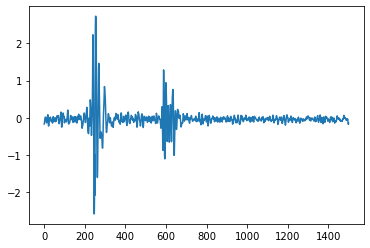

In [15]:
plt.plot(pec52_sig[int(arr_final[0])-200:int(arr_final[0])+1300,0])

In [16]:
#envelogram
#compute DFT or FFT of PCG signal
#keep -ve dft as 0 (N/2+2 to N as 0)
# 2 to N/2+1 multiply by 2 x(1) same
#computer inverse dft(analytical signal)
# magnitude of rsultant signal is envelogram

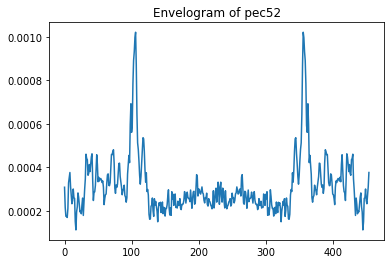

In [17]:
#compute envelogram
from scipy.fft import fft, fftfreq,ifft
fs=400
N = 1024
     # sample spacing
T = 1.0 / fs
yif1=np.zeros(512)
for i in range(1,16):
    y=pec52_sig[int(arr_final[i])-100:int(arr_final[i])+1300,0]
    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]
    yff=2.0/N * np.abs(yf[0:N//2])
    yif=abs(ifft(yff))
    yif1=yif1+yif
yif1=yif1/17
plt.plot(yif1[25:480])
plt.title("Envelogram of pec52")
plt.show()
    

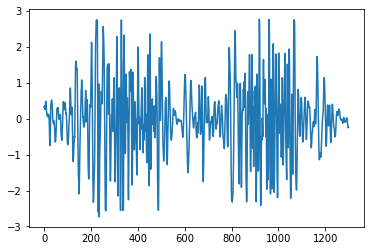

In [18]:
plt.plot(pec33_sig[int(arr_final[2])-100:int(arr_final[2])+1200,0])

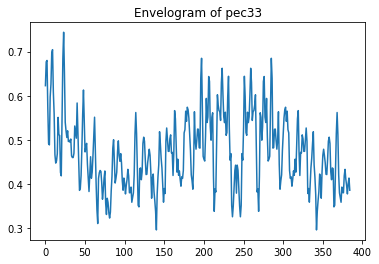

In [19]:
#compute envelogram
from scipy.fft import fft, fftfreq,ifft
fs=400
N = 1024
     # sample spacing
T = 1.0 / fs
yif1=np.zeros(512)
for i in range(13):
    y=pec33_sig[int(arr_final[i])-200:int(arr_final[i+1])-500,0]
    yf = fft(y)
    xf = fftfreq(N, T)[:(N//2)+1]
    yff=np.abs(yf[0:N//2])
    yif=abs(ifft(yff))
    yif1=yif1+yif
yif1=yif1/13
plt.plot(yif1[15:400])
plt.title("Envelogram of pec33")
plt.show()
    

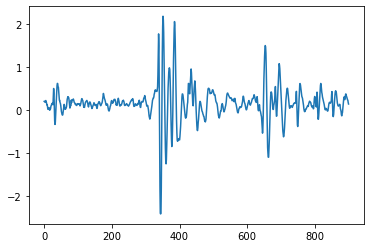

In [20]:
plt.plot(pec1_sig[int(arr_final[4])-100:int(arr_final[4])+800,0])

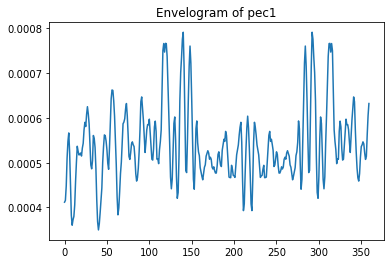

In [21]:
#compute envelogram
from scipy.fft import fft, fftfreq,ifft
fs=400
N = 1024
     # sample spacing
T = 1.0 / fs
yif1=np.zeros(512)
for i in range(1,13):
    y=pec1_sig[int(arr_final[i])-100:int(arr_final[i])+800,0]
    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]
    yff=2.0/N * np.abs(yf[0:N//2])
    yif=abs(ifft(yff))
    yif1=yif1+yif
yif1=yif1/13
plt.plot(yif1[40:400])
plt.title("Envelogram of pec1")
plt.show()
    

In [38]:
#Average No of zero crossings for 70ms ie aproximately
c=0
for i in range(np.size(final_ecg_out1)):
    if final_ecg_out1[i]>0:
        c=c+1

print(c/280) # 280 samples is equal to 70ms

c=0
for i in range(np.size(final_ecg_out2)):
    if final_ecg_out2[i]>0:
        c=c+1

print(c/280) # 280 samples is equal to 70ms

c=0
for i in range(np.size(final_ecg_out3)):
    if final_ecg_out3[i]>0:
        c=c+1

print(c/280) # 280 samples is equal to 70ms

0.2357142857142857
0.3107142857142857
0.14285714285714285
